In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from utils import *

/home/chris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_excel('data/sebrae.xls')
print(df.shape)
df.head(3)

(1286, 17)


,N. da manifestação,Situação,Área de tratamento,Relato,Natureza,Assunto principal,Sub assunto 1,Sub assunto 2,Sub assunto 3,Produto serviço,Canal de entrada,Cliente interno,Cidade do cliente,UF do cliente,Dt. cadastro manifestação,Previsão de conclusão,Tempo resposta
0,76432018,Finalizada,Sebrae/AC,Boa tarde.\n\nDesde algum tempo que acompanho ...,Solicitação,Atendimento Sebrae,Online/Chat,Cadastro,NaN,NaN,Portal,Não,NaN,NaN,25/10/2018 13:25,04/11/2018,6
1,85632018,Finalizada,Sebrae/AC,Sou Julio Cesar Freitas moro na cidade de Rio ...,Reclamação,Atendimento Sebrae,Presencial,Falta de retorno,NaN,NaN,Portal,Não,Rio Branco,AC,06/12/2018 12:15,16/12/2018,15
2,87912018,Finalizada,Sebrae/AC,o meu programa de nfe nao esta mais instalando,Solicitação,Emissor de Nota Fiscal - NF-e/CT-e,NaN,NaN,NaN,NaN,Chatbot,Não,NaN,AC,19/12/2018 18:54,29/12/2018,2


### Distribuição das manifestações por categoria

Solicitação    507
Reclamação     454
Elogio         204
Sugestão        78
Crítica         43
Name: Natureza, dtype: int64


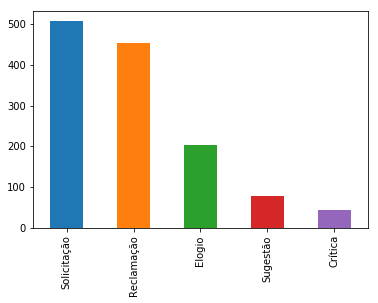

In [3]:
print(df.Natureza.value_counts())
df.Natureza.value_counts().plot.bar()

In [4]:
df['class'] = df.Natureza.replace({'Solicitação': 0, 'Reclamação': 1, 'Elogio': 2,'Sugestão': 3,'Crítica': 4})

#### Significado das classes
* 0 - Solicitação
* 1 - Reclamação
* 2 - Elogio
* 3 - Sugestão
* 4 - Crítica

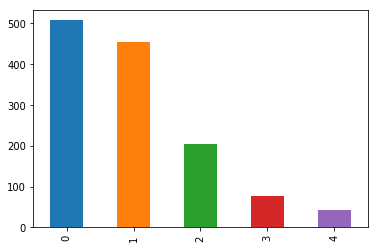

In [5]:
df['class'].value_counts().plot.bar()

### Amostra das manifestações

In [6]:
print("Reclamação:")
for valor in df.loc[df['class']==1]['Relato'][:1].values:
    print(valor)
print("")    

print("Elogio:")
for valor in df.loc[df['class']==2]['Relato'][:1].values:
    print(valor)
print("")    

print("Crítica:")
for valor in df.loc[df['class']==4]['Relato'][:1].values:
    print(valor)


Reclamação:
Sou Julio Cesar Freitas moro na cidade de Rio Branco e venho manifestar minha insatisfação com o atendimento no Sebrae-AC.
Essa é a terceira vez em 2 anos que procuro o Sebrae local buscando  orientações e informações sobre como iniciar um negócio que idealizado, mas não tenho tido “sorte”.
O processo de atendimento parece não ter um fluxo padronizado. A impressão que tive, nas vezes que procurei atendimento, é que existe um enorme abismo entre o serviço propagandeado pelo Sebrae e a realidade no atendimento.
Quero dizer que o acolhimento - pelo menos inicial já que nunca consegui passar dele - não tem fluidez.
Na minha experiência, particularmente, sempre apareceram obstáculos. Não retorno de atendimento, remarcações e imprevistos são alguns das ocorrências que marcam minha passagem pelo órgão.
Resumindo numa frase a minha impressão do Sebrae-AC: há um certo nível de falta de informação aliado a uma possível ausência de processo, de fluxo no atendimento inicial que acaba a

In [7]:
print("max len text:",df.Relato.map(lambda x: len(x)).max())

max len text: 4096


### remove stop words

In [8]:
stop_words = ['de','e','a','o','quem','que','do','para','no',
             'em','da','um','uma','com','na','por','me','O',
             'ao','é','como','foi','as','os','meu','A','se',
             '-','eu','DE','pelo','E','mas','minha','dos',
             'pela','ou','pois','at','já','DO','QUE','das',
             'No',',','nos','ser','está','O','esse','at',
              'estou','sem','O',
             'Estou','No','EM','Por','sobre','tem','É','à',
             'pra','ter','tudo','A','Eu','você','DA','esta',
             'sua','PARA','onde','estava','.','fui','Como',
             'quando','NO','aos','até','essa','este','sou',
              '–','at','No']

df2 = remove_stop_words(df,stop_words)

In [9]:
X = df2.Relato
y = df2['class']

In [10]:
vectorizer = TfidfVectorizer()
X_list = vectorizer.fit_transform(X)
print("qtd de palavras diferentes no vocabulário:", len(vectorizer.get_feature_names()))

qtd de palavras diferentes no vocabulário: 12383


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_list,y,test_size=0.2, random_state=1) 

In [12]:
print(X_train.shape) 

(1028, 12383)


In [13]:
clf = RandomForestClassifier(n_estimators=100,max_depth=75).fit(X_train, y_train) 

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(y_test.values[:30])
print(y_pred[:30])

[2 0 0 0 2 2 0 2 0 2 1 0 0 0 1 1 1 1 1 2 0 1 1 0 1 2 0 0 1 0]
[0 0 0 0 2 0 0 2 0 2 1 0 1 1 1 0 0 1 1 2 0 1 0 0 1 2 0 0 1 0]


In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)


Confusion matrix, without normalization
[[93 13  1  0  0]
 [41 48  1  0  0]
 [11  4 32  0  0]
 [ 8  1  1  0  0]
 [ 4  0  0  0  0]]


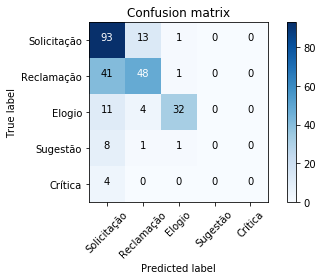

In [17]:
plt.figure()
classes = ['Solicitação','Reclamação','Elogio','Sugestão','Crítica']
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix')

In [18]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=classes))

accuracy 0.6705426356589147
             precision    recall  f1-score   support

Solicitação       0.59      0.87      0.70       107
 Reclamação       0.73      0.53      0.62        90
     Elogio       0.91      0.68      0.78        47
   Sugestão       0.00      0.00      0.00        10
    Crítica       0.00      0.00      0.00         4

avg / total       0.67      0.67      0.65       258



/home/chris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
for index in range(30):
    X_test_dummy = vectorizer.transform([df.Relato[index]])
    previsao = clf.predict(X_test_dummy)[0]
    if(previsao != df['class'][index]): #errou
        print("errou a previsao no indice:",index)
        print("texto:", df.Relato[index])
        print("classe prevista:", previsao)
        print("classe verdadeira:",df['class'][index])
        print("")

errou a previsao no indice: 8
texto: ligo toda hora ninguem atende
classe prevista: 0
classe verdadeira: 1



### Gridsearch para tunagem de hyperparams

In [20]:
tuned_parameters = {'n_estimators':[5,10,20,40,80,100, 120, 160, 180], 
                    'max_depth':[5, 10, 20, 30, 40, 50, 75],
                    'random_state':[0],
                   'warm_start':[True,False]}

In [21]:
# clf = GridSearchCV(RandomForestClassifier(), tuned_parameters)
# clf.fit(X_train, y_train.values.ravel())

# print("Best parameters set found on development set:")
# print()
# print(clf.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print()

# print("Detailed classification report:")
# print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
# print()
# y_true, y_pred = y_test, clf.predict(X_test)
# print(classification_report(y_true, y_pred))
# print()

# #Best parameters set found on development set:

# #{'max_depth': 75, 'n_estimators': 100, 'random_state': 0, 'warm_start': True}